## Ejercicio 6  
Se le propone a un grupo de niños y niñas una actividad: construir torres lo más altas posible usando bloques cúbicos y cilíndricos. Se registran las edades de los infantes, el número de bloques y el
tiempo empleado.  
En este problema, solo consideramos el número de bloques utilizados y las
edades.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../datasets/blocks.csv")
df = df.drop(df.columns[0], axis= 1)
df['Shape'] = df['Shape'].replace({'Cube': 0, 'Cylinder': 1})
df.head()

,Child,Number,Time,Trial,Shape,Age
0,A,11,30.0,1,0,4.67
1,B,9,19.0,1,0,5.00
2,C,8,18.6,1,0,4.42
3,D,9,23.0,1,0,4.33
4,E,10,29.0,1,0,4.33


### Punto a
Graficar el número de bloques 𝑦 vs las edades 𝑥. A partir del gráfico, proponer un MLG.

Text(0, 0.5, 'Bloques')

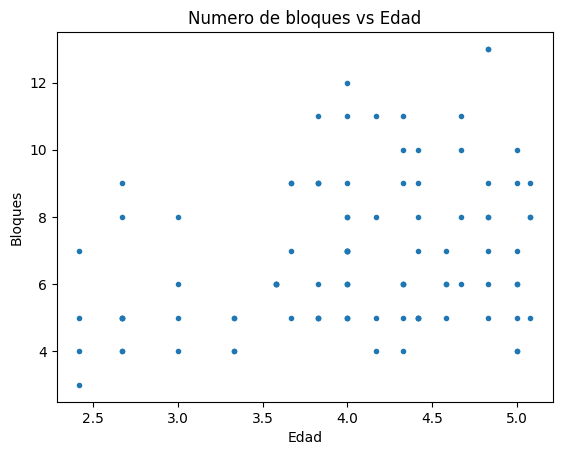

In [20]:
plt.title("Numero de bloques vs Edad")
plt.plot(df['Age'], df['Number'], ".")
plt.xlabel("Edad")
plt.ylabel("Bloques")

### Punto b

Ajustar este MLG, es decir, encontrar estimaciones puntuales para los parámetros de regresión 𝛽.


(array([ 1., 10., 25., 18., 11., 11., 12.,  4.,  5.,  3.]),
 array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <BarContainer object of 10 artists>)

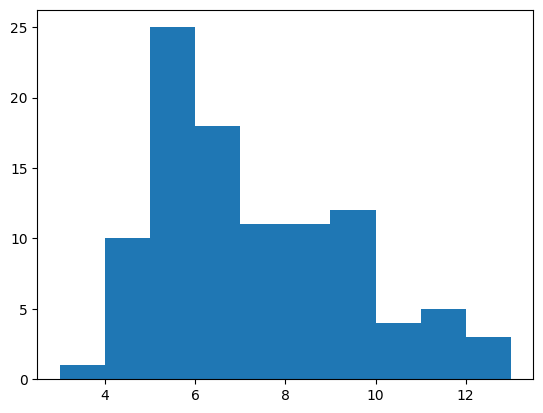

In [21]:
plt.hist(df["Number"])

Parece una Poisson  
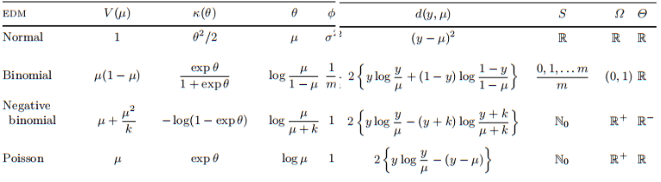

g(mu) = log(mu)

In [43]:
import numpy as np
from scipy.optimize import minimize
import math


y = df["Number"].values
X = df.drop(["Number", "Child"], axis = 1)

# log(mu) = regresor lineal


# Función de verosimilitud para el modelo de regresión de Poisson
def poisson_log_likelihood(params, X, y):
    """
    Función de log-verosimilitud para el modelo de regresión de Poisson.

    params: Coeficientes de regresión.
    X: Matriz de características.
    y: Vector de variable respuesta.
    """
    # Calcular mu utilizando el modelo lineal
    mu = np.exp(np.dot(X, params))

    y_factoriales = np.zeros_like(y, dtype=np.int64)
    for i, num in enumerate(y):
        y_factoriales[i] = math.factorial(num)


    # Calcular el log-likelihood
    log_likelihood = np.sum(y * np.log(mu) - mu - np.log(y_factoriales))

    return -log_likelihood  # negativo para la minimización


X_intercept = np.column_stack((np.ones(X.shape[0]), X))

# Inicializamos los coeficientes del modelo
initial_betas = np.zeros(X_intercept.shape[1])

# Minimizamos la función de verosimilitud negativa
result = minimize(poisson_log_likelihood, initial_betas, args=(X_intercept, y))

# Coeficientes estimados
betas_hat = result.x

print("Betas estimados:", betas_hat)

Betas estimados: [ 1.34644723  0.00409692  0.0293925  -0.33404096  0.1352262 ]


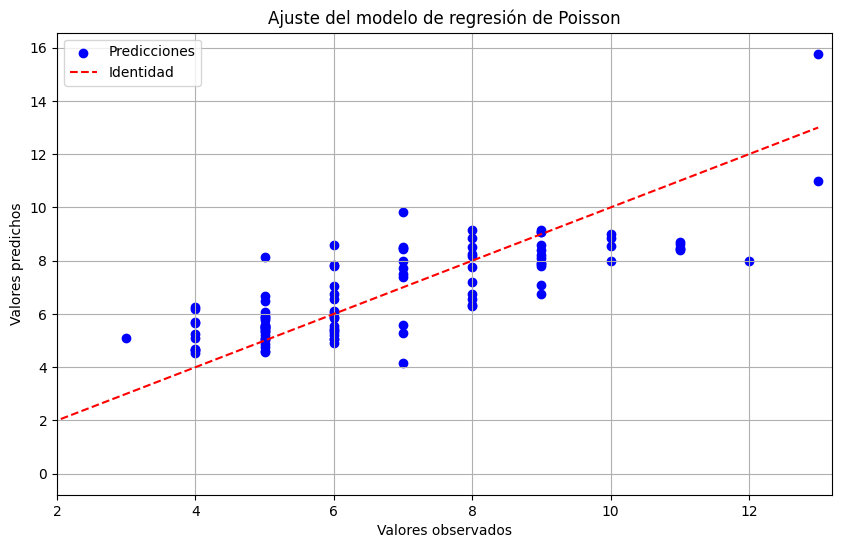

In [72]:
# Calcular las predicciones del modelo
mu_pred = np.exp(np.dot(X_intercept, betas_hat))

# Graficar las predicciones y los valores observados
plt.figure(figsize=(10, 6))
plt.scatter(y, mu_pred, color='blue', label='Predicciones')
plt.plot([0, max(y)], [0, max(y)], color='red', linestyle='--', label='Identidad')
plt.xlabel('Valores observados')
plt.xlim(2, 13.2)
plt.ylabel('Valores predichos')
plt.title('Ajuste del modelo de regresión de Poisson')
plt.legend()
plt.grid(True)
plt.show()


### Punto C
Determinar el error estándar de cada parámetro de regresión (los betas)

In [61]:
# Paso 1: Calcular la matriz de información
V = np.diag(mu_pred)
info_matrix = (X_intercept.T @ V) @ X_intercept

# Paso 2: Calcular la matriz de covarianza de los coeficientes
cov_matrix = np.linalg.inv(info_matrix)

# Paso 3: Sacar las varianzas de los beta_hat (son los elementos de la diagonal)
vars = np.diag(cov_matrix)

# Calcular los errores estándar de los coeficientes
std_errors = np.sqrt(vars)

print("Errores estándar de los coeficientes estimados:", std_errors)

Errores estándar de los coeficientes estimados: [0.25621538 0.00126678 0.07666101 0.08096612 0.0535161 ]


In [64]:
phi = 1

# Calcular la matriz de varianza-covarianza V(mu)
V_mu = np.diag(mu_pred)

W = 1 / (V_mu*(1/mu_pred)**2)

# information_matrix = (1/phi) * (np.sum(W @ X_intercept))

# Calcular la matriz de información
information_matrix = (1 / phi) * np.sum(W[:, None, None] * X_intercept[:, :, None] * X_intercept[:, None, :], axis=0)


C:\Users\nazar\AppData\Local\Temp\ipykernel_16704\2548729737.py:6: RuntimeWarning: divide by zero encountered in divide
  W = 1 / (V_mu*(1/mu_pred)**2)
C:\Users\nazar\AppData\Local\Temp\ipykernel_16704\2548729737.py:11: RuntimeWarning: invalid value encountered in multiply
  information_matrix = (1 / phi) * np.sum(W[:, None, None] * X_intercept[:, :, None] * X_intercept[:, None, :], axis=0)


ValueError: operands could not be broadcast together with shapes (100,100,5,100) (100,1,5) 